In [1]:
import os.path as op
import sys

import torch
import numpy as np
from PIL import Image
import yaml

sys.path.append('..')
from utils import vis_segmentation, display_example_pair, vis_grid_4x3, run_inference

In [2]:
torch.cuda.is_available()

False

In [3]:
np.random.seed(42)

In [4]:
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

Visualize an example pair from the dataset. We will run inference on this image

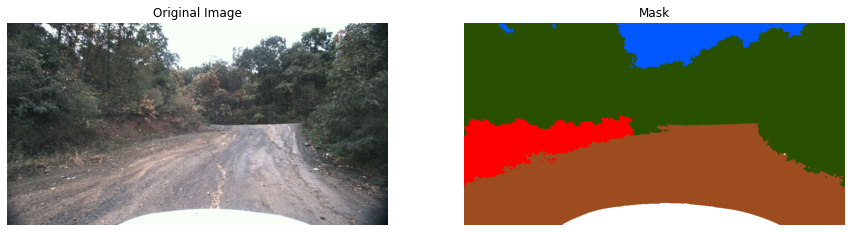

In [5]:
data_path = op.join('..', config['DATA_PATH'])
example_image = Image.open(op.join(data_path, 'train/iid000008/rgb.jpg'))
example_mask = Image.open(op.join(data_path, 'train/iid000008/labels.png'))
image_display = np.array(example_image)
mask_display = np.array(example_mask.convert('RGB'))
display_example_pair(image_display, mask_display)

Load a previously trained model and run the image through it

In [8]:
model = torch.load(op.join('..', config['LOAD_MODEL_PATH']),map_location=torch.device('cpu'))
model.eval();

In [9]:
predicted_masks = run_inference(model, example_image)

Finally, we take the orginal example image, and using the segmentation map, a custom color map for our labels, and the label names, overlay the segmentation map and create a key for each of the classes

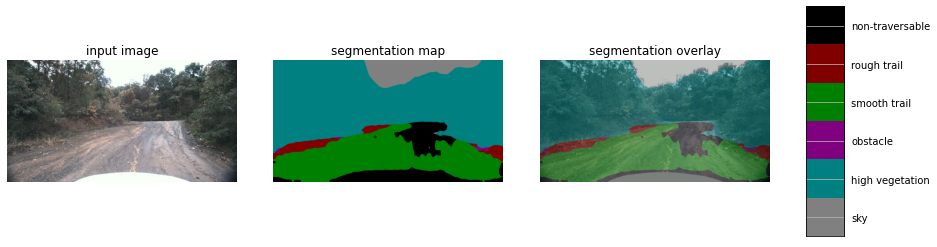

In [10]:
vis_segmentation(example_image, np.array(predicted_masks))

More example output, taken from our paper

In [11]:
vis_grid_4x3(model, data_path)

ValueError: not enough values to unpack (expected 2, got 0)